## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [12]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
labels = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

reviews_series = reviews.squeeze()
labels_series = labels.squeeze()

# Split data into train-test and then train-validation sets
X_train, X_test, y_train, y_test = train_test_split(reviews_series, labels_series, test_size=0.15, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=7)

# Reset indices for cleanliness
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Ensure labels are 1D
y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()

# Print dataset shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (18062,) (18062,)
Validation set: (3188,) (3188,)
Test set: (3750,) (3750,)


In [20]:
# Bag-of-Words (BoW) Representation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with a limit of 10,000 most frequent words
bow = CountVectorizer(max_features=10000)

# Fit on the training data
X_train_bow = bow.fit_transform(X_train)
X_val_bow = bow.transform(X_val)
X_test_bow = bow.transform(X_test)

# Convert sparse matrices to dense arrays
X_train_bow = X_train_bow.toarray()
X_val_bow = X_val_bow.toarray()
X_test_bow = X_test_bow.toarray()

# Get vocabulary
vocab = bow.get_feature_names_out()
print("Vocabulary size:", len(vocab))

Vocabulary size: 10000


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [21]:
# Let's check a single sample
index_to_inspect = 87
print("Raw text:", X_train[index_to_inspect])  # Raw text
print("Word vector:", X_train_bow[index_to_inspect],
      " - length:", len(X_train_bow[index_to_inspect]))  # Word vector

# Match word vector to vocabulary and sort by count
word_counts = {vocab[i]: c for i, c in enumerate(X_train_bow[index_to_inspect]) if c > 0}
word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# Display most important words for this text
print("Word counts (sorted):", word_counts)

Raw text: scanners ii the new order is just as good as david cronenberg  s classic scanners  scanners was made in     and scanners ii in     so their  s an eleven year gap between the two movies . the film captures the style of scanners which is a good thing  it wouldn  t be scanners without a head explosion so scanners ii has a head explosion scene that  s just has gruesome as the first . scanners ii the new order has some other imaginative gory scenes that are done well . the plot to scanners ii the new order is a new take on the series since it has the scanners being used as a vigilante force for a police chief and a group of scientists until a young scanner named david kellum discovers he  s being used and decides to get revenge .  br    br   scanners ii the new order is a great sequel to david cronenberg  s sci  fi classic scanners and should be seen . check this out .       
Word vector: [0 0 0 ... 0 0 0]  - length: 10000
Word counts (sorted): {'the': 11, 'ii': 6, 'new': 5, 'and'

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the neural network
model = Sequential([
    Input(shape=(10000,)),  # Input size matches the number of features (10,000 most frequent words)
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_bow, y_train,
    validation_data=(X_val_bow, y_val),
    epochs=10, batch_size=32
)

final_val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")



Epoch 1/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8187 - loss: 0.4134 - val_accuracy: 0.8833 - val_loss: 0.3003
Epoch 2/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9395 - loss: 0.1676 - val_accuracy: 0.8708 - val_loss: 0.3256
Epoch 3/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9695 - loss: 0.0904 - val_accuracy: 0.8739 - val_loss: 0.3758
Epoch 4/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9903 - loss: 0.0380 - val_accuracy: 0.8717 - val_loss: 0.4426
Epoch 5/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9975 - loss: 0.0161 - val_accuracy: 0.8730 - val_loss: 0.5488
Epoch 6/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 0.8708 - val_loss: 0.6184
Epoch 7/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9974 - loss: 0.0137 - val_accuracy: 0.8576 - val_loss: 0.6641
Epoch 8/10
565/565 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9999 - loss: 0.0040 - 

**(d)** Test your sentiment-classifier on the test set.

In [29]:
# Evaluate the model on the test set.
test_loss, test_accuracy = model.evaluate(X_test_bow, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8815 - loss: 0.7549
Test Accuracy: 88.19%


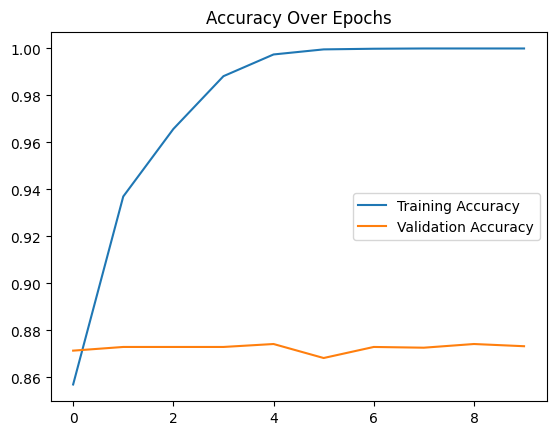

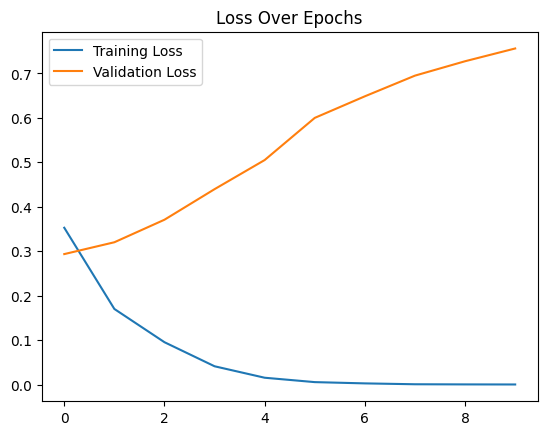

In [28]:
# Visualize the training and validation accuracy/loss over epochs.
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

**(e)** Use the classifier to classify a few sentences you write yourselves.


In [ ]:
custom_sentences = [
    "I love Aarhus, It is fantastic.",
    "I like studying at VIA, It's great."
]

# Transform sentences to Bag-of-Words representation
custom_sentences_bow = bow.transform(custom_sentences).toarray()

# Predict sentiment
predictions = model.predict(custom_sentences_bow)

# Display results
for sentence, prediction in zip(custom_sentences, predictions):
    sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
    print(f"Review: {sentence}")
    print(f"Predicted Sentiment: {sentiment} (Probability: {prediction[0]:.2f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Review: I love Aarhus, It is fantastic.
Predicted Sentiment: Positive (Probability: 0.96)

Review: I like studying at VIA, It's great.
Predicted Sentiment: Positive (Probability: 0.96)

